# Road Accident Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

C:\Users\saurabh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("C:/Users/saurabh/Desktop/Dataset A - Road Accident Data\Road_Accident_Data.csv")

In [3]:
df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_DESCRIPTION,DCA_CODE_DESCRIPTION,DCA_CODE_TYPE,LIGHT_CONDITION_DESCRIPTION,NO_PERSONS_INVOLVED,NO_PERSONS_KILLED,NO_PERSONS_INJ_SERIOUS,...,ROAD_NAME_2,ROAD_TYPE_2,DIRECTION_LOCATION,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LGA_NAME,REGION_NAME
0,T20110000012,1/01/2011,1:06:00,Struck pedestrian,Near side,Pedestrian on foot/toy/pram,Dark street lights on,2,0,0,...,THE ESPLANADE,NaN,NaN,MEL,ED35,92,K,9,KINGSTON,METROPOLITAN SOUTH EAST REGION
1,T20110000014,1/01/2011,0:15:00,Collision with a fixed object,Left off carriageway into object/parked vehicle,Off path on straight,Dark street lights on,1,0,1,...,LORIMER,STREET,NaN,MEL,ED35,20,H,2,BANYULE,METROPOLITAN NORTH WEST REGION
2,T20110000023,1/01/2011,4:28:00,Struck pedestrian,Other pedestrian,Pedestrian on foot/toy/pram,Dark street lights on,3,0,2,...,POUND,ROAD,N,MEL,ED35,96,F,6,CASEY,METROPOLITAN SOUTH EAST REGION
3,T20110000025,1/01/2011,1:07:00,Struck pedestrian,"Playing, working, lying, standing on carriageway",Pedestrian on foot/toy/pram,Dark no street lights,2,1,1,...,CALDER,HIGHWAY,SW,VCD,ED7,626,B,10,BENDIGO,NORTHERN REGION
4,T20110000035,1/01/2011,11:54:00,Collision with a fixed object,Right off carriageway into object/parked vehicle,Off path on straight,Day,1,0,1,...,UNNAMED,NaN,SE,MEL,ED35,72,H,2,KNOX,METROPOLITAN SOUTH EAST REGION


In [20]:
df.dtypes

ACCIDENT_NO                                 object
ACCIDENT_DATE                       datetime64[ns]
ACCIDENT_TIME                       datetime64[ns]
ACCIDENT_DESCRIPTION                        object
DCA_CODE_DESCRIPTION                        object
DCA_CODE_TYPE                               object
LIGHT_CONDITION_DESCRIPTION                 object
NO_PERSONS_INVOLVED                          int32
NO_PERSONS_KILLED                            int32
NO_PERSONS_INJ_SERIOUS                       int32
NO_PERSONS_INJ_MEDICAL_ATTENTION             int32
NO_PERSONS_NOT_INJ                           int32
NO_OF_VEHICLES                               int32
POLICE_ATTEND_DESCRIPTION                   object
ROAD_GEOMETRY_DESCRIPTION                   object
SEVERITY                                    object
SEVERITY_DESCRIPTION                        object
SPEED_ZONE                                  object
LOCATION_TYPE                               object
LOCALS_INVOLVED                

In [5]:
df.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_DESCRIPTION',
       'DCA_CODE_DESCRIPTION', 'DCA_CODE_TYPE', 'LIGHT_CONDITION_DESCRIPTION',
       'NO_PERSONS_INVOLVED', 'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_SERIOUS',
       'NO_PERSONS_INJ_MEDICAL_ATTENTION', 'NO_PERSONS_NOT_INJ',
       'NO_OF_VEHICLES', 'POLICE_ATTEND_DESCRIPTION',
       'ROAD_GEOMETRY_DESCRIPTION', 'SEVERITY', 'SEVERITY_DESCRIPTION',
       'SPEED_ZONE', 'LOCATION_TYPE', 'LOCALS_INVOLVED', 'LON', 'LAT',
       'ROAD_NAME_1', 'ROAD_TYPE_1', 'ROAD_NAME_2', 'ROAD_TYPE_2',
       'DIRECTION_LOCATION', 'DIRECTORY', 'EDITION', 'PAGE',
       'GRID_REFERENCE_X', 'GRID_REFERENCE_Y', 'LGA_NAME', 'REGION_NAME'],
      dtype='object')

In [19]:
df["NO_PERSONS_INVOLVED"] = df["NO_PERSONS_INVOLVED"].astype('int')
df["NO_PERSONS_KILLED"] = df["NO_PERSONS_KILLED"].astype('int')
df["NO_PERSONS_INJ_SERIOUS"] = df["NO_PERSONS_INJ_SERIOUS"].astype('int')
df["NO_PERSONS_INJ_MEDICAL_ATTENTION"] = df["NO_PERSONS_INJ_MEDICAL_ATTENTION"].astype('int')
df["NO_PERSONS_NOT_INJ"] = df["NO_PERSONS_NOT_INJ"].astype('int')
df["NO_OF_VEHICLES"] = df["NO_OF_VEHICLES"].astype('int')
df["ACCIDENT_DATE"] = pd.to_datetime(df['ACCIDENT_DATE'])
df["ACCIDENT_TIME"] = pd.to_datetime(df['ACCIDENT_TIME'])
df["SPEED_ZONE"] = df["NO_PERSONS_INVOLVED"].astype('object')
df["SEVERITY"] = df["SEVERITY"].astype('object')
df["GRID_REFERENCE_Y"] = df["GRID_REFERENCE_Y"].astype('object')
df["LAT"] = df["LAT"].astype('object')
df["LON"] = df["LON"].astype('object')

In [7]:
df.describe()

,NO_PERSONS_INVOLVED,NO_PERSONS_KILLED,NO_PERSONS_INJ_SERIOUS,NO_PERSONS_INJ_MEDICAL_ATTENTION,NO_PERSONS_NOT_INJ,NO_OF_VEHICLES,LON,LAT,GRID_REFERENCE_Y
count,25484.000000,25484.000000,25484.000000,25484.000000,25484.000000,25484.000000,25484.000000,25484.000000,25484.000000
mean,2.446241,0.022092,0.384516,0.890245,1.148014,1.798933,144.977278,-37.714460,6.420813
std,1.440379,0.165094,0.631211,0.769264,1.260948,0.754266,0.823206,0.566140,3.272459
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,140.966167,-38.886025,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,144.865023,-37.955679,4.000000
50%,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,145.017175,-37.817704,6.000000
75%,3.000000,0.000000,1.000000,1.000000,2.000000,2.000000,145.203863,-37.706440,9.000000
max,31.000000,6.000000,10.000000,11.000000,21.000000,16.000000,149.673021,-34.132725,12.000000


In [8]:
df.isnull().sum()

ACCIDENT_NO                             0
ACCIDENT_DATE                           0
ACCIDENT_TIME                           0
ACCIDENT_DESCRIPTION                    0
DCA_CODE_DESCRIPTION                    0
DCA_CODE_TYPE                           0
LIGHT_CONDITION_DESCRIPTION             0
NO_PERSONS_INVOLVED                     0
NO_PERSONS_KILLED                       0
NO_PERSONS_INJ_SERIOUS                  0
NO_PERSONS_INJ_MEDICAL_ATTENTION        0
NO_PERSONS_NOT_INJ                      0
NO_OF_VEHICLES                          0
POLICE_ATTEND_DESCRIPTION               0
ROAD_GEOMETRY_DESCRIPTION               0
SEVERITY                                0
SEVERITY_DESCRIPTION                    0
SPEED_ZONE                              0
LOCATION_TYPE                           0
LOCALS_INVOLVED                         0
LON                                     0
LAT                                     0
ROAD_NAME_1                             1
ROAD_TYPE_1                       

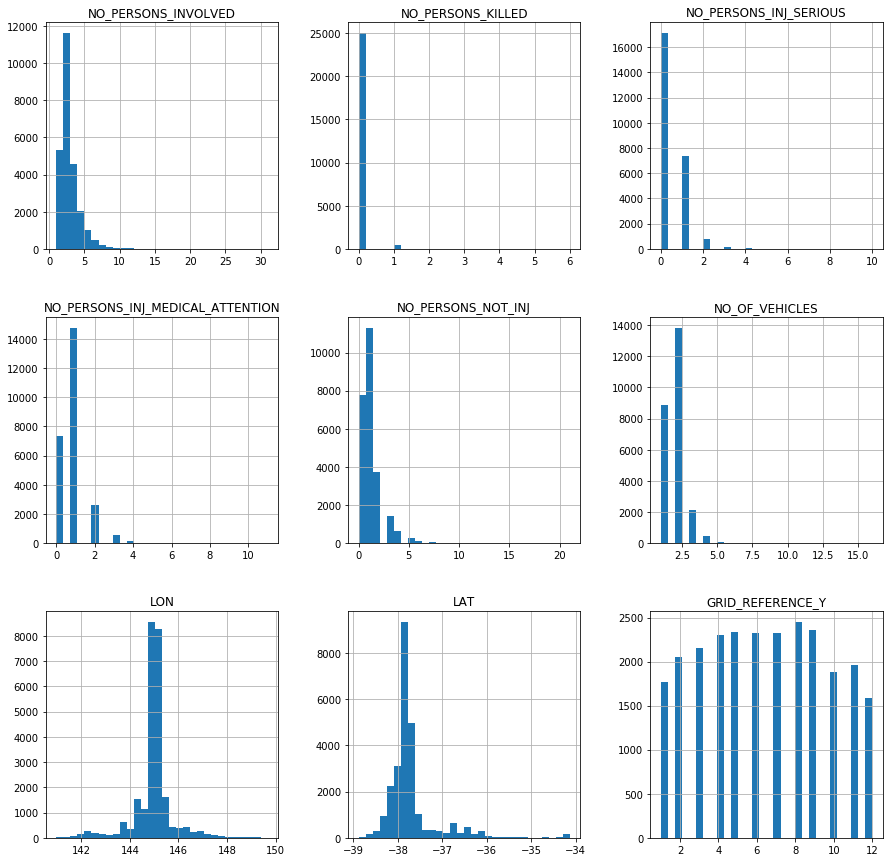

In [9]:
df.hist(figsize = (15, 15), bins = 30)
plt.show()

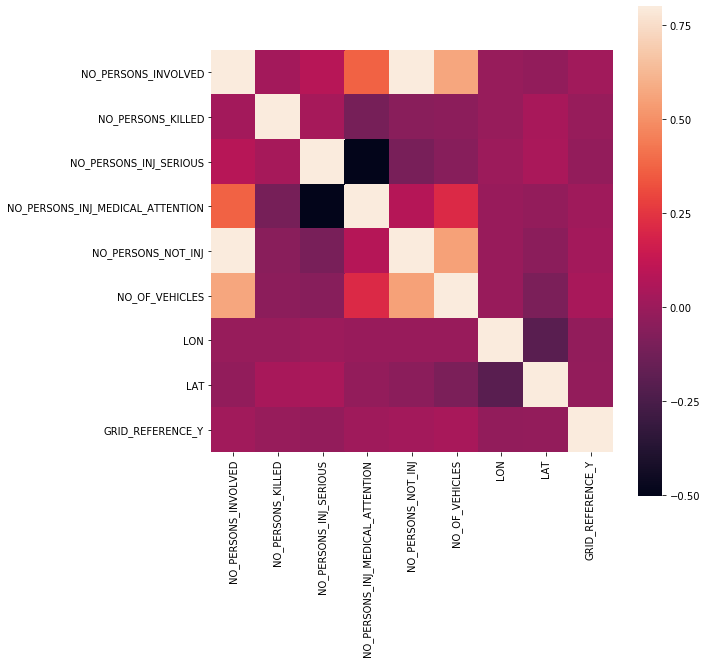

In [10]:
#correlation matrix, helps to see, if there is any correlation exists between features
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
df.corr()

,NO_PERSONS_INVOLVED,NO_PERSONS_KILLED,NO_PERSONS_INJ_SERIOUS,NO_PERSONS_INJ_MEDICAL_ATTENTION,NO_PERSONS_NOT_INJ,NO_OF_VEHICLES,LON,LAT,GRID_REFERENCE_Y
NO_PERSONS_INVOLVED,1.000000,0.026695,0.084048,0.372898,0.866960,0.568910,-0.011015,-0.028545,0.020942
NO_PERSONS_KILLED,0.026695,1.000000,0.037099,-0.108828,-0.052655,-0.039013,-0.012054,0.039589,-0.008710
NO_PERSONS_INJ_SERIOUS,0.084048,0.037099,1.000000,-0.501426,-0.103557,-0.057016,0.002839,0.043469,-0.018514
NO_PERSONS_INJ_MEDICAL_ATTENTION,0.372898,-0.108828,-0.501426,1.000000,0.081073,0.211999,-0.006956,-0.021192,0.014856
NO_PERSONS_NOT_INJ,0.866960,-0.052655,-0.103557,0.081073,1.000000,0.553106,-0.007556,-0.046816,0.024951
NO_OF_VEHICLES,0.568910,-0.039013,-0.057016,0.211999,0.553106,1.000000,-0.003742,-0.091405,0.040624
LON,-0.011015,-0.012054,0.002839,-0.006956,-0.007556,-0.003742,1.000000,-0.197910,-0.026458
LAT,-0.028545,0.039589,0.043469,-0.021192,-0.046816,-0.091405,-0.197910,1.000000,-0.019260
GRID_REFERENCE_Y,0.020942,-0.008710,-0.018514,0.014856,0.024951,0.040624,-0.026458,-0.019260,1.000000


In [12]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file("C:/Users/saurabh/Desktop/Dataset A - Road Accident Data/feb22_vic_lga_polygon_shp/VIC_LGA_POLYGON_shp/vic_lga.shp")

OSError: could not find or load spatialindex_c-64.dll